In [24]:
%reload_ext autoreload
%autoreload 2

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns',200)

In [26]:
df = pd.read_csv('../data/20181024_d1_0830_0900.csv')
df.head()

,track_id; type; traveled_d; avg_speed; lat; lon; speed; lon_acc; lat_acc; time
0,1; Car; 48.85; 9.770344; 37.977391; 23.737688;...
1,2; Motorcycle; 98.09; 19.839417; 37.977642; 23...
2,3; Motorcycle; 63.80; 18.228752; 37.977997; 23...
3,4; Motorcycle; 145.72; 26.229014; 37.978135; 2...
4,5; Motorcycle; 138.01; 24.841425; 37.978134; 2...


In [27]:
df.iloc[1][0]


/var/folders/lm/nbd77rgs2z5g_ldtjhrblytc0000gn/T/ipykernel_64953/1154082844.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[1][0]


'2; Motorcycle; 98.09; 19.839417; 37.977642; 23.737400; 16.9759; -0.0361; -0.0228; 0.000000; 37.977642; 23.737402; 16.9739; 0.0087; -0.0262; 0.040000; 37.977641; 23.737404; 16.9771; 0.0362; -0.0296; 0.080000; 37.977641; 23.737407; 16.9843; 0.0638; -0.0330; 0.120000; 37.977641; 23.737409; 16.9974; 0.1172; -0.0365; 0.160000; 37.977640; 23.737411; 17.0199; 0.1964; -0.0400; 0.200000; 37.977640; 23.737413; 17.0558; 0.3015; -0.0435; 0.240000; 37.977640; 23.737415; 17.1067; 0.4060; -0.0471; 0.280000; 37.977639; 23.737417; 17.1709; 0.4847; -0.0505; 0.320000; 37.977639; 23.737419; 17.2445; 0.5384; -0.0536; 0.360000; 37.977639; 23.737421; 17.3241; 0.5670; -0.0565; 0.400000; 37.977638; 23.737423; 17.4079; 0.5964; -0.0591; 0.440000; 37.977638; 23.737425; 17.4971; 0.6430; -0.0598; 0.480000; 37.977638; 23.737428; 17.2954; 0.3189; -0.0370; 0.520000; 37.977637; 23.737430; 17.3429; 0.3401; -0.0289; 0.560000; 37.977637; 23.737432; 17.3927; 0.3524; -0.0154; 0.600000; 37.977637; 23.737434; 17.4444; 0.3647

In [28]:
csv_file = "../data/20181024_d1_0830_0900.csv"
delimiter = ';'

with open(csv_file, 'r') as file:
    lines = file.readlines()
    # lines = lines[1:]
    # vehicle_information = 
    for line in lines:
        # line = line.strip('\n').strip(' ')
        print(line)
        break


track_id; type; traveled_d; avg_speed; lat; lon; speed; lon_acc; lat_acc; time



In [29]:
with open(csv_file, 'r') as file:
    lines = file.readlines()
    # lines = lines[1:]
    vehicle_information = []
    trajectory_information = []
     # jumping the first line which is the header ['track_id', ' type', ' traveled_d', ' avg_speed', ' lat', ' lon', ' speed', ' lon_acc', ' lat_acc', ' time']
    lines = lines[1:]
    for line in lines:
        # removing the \n at the end of the line
        line = line.strip('\n').strip(' ')
        # splitting the contents based on ;
        contents = line.split(delimiter)
        # removing the white spaces
        contents = [contents[i].strip() for i in range(len(contents))]

        vehicle_information.append(contents[:4])

        k = 4 # skipping the first 4 columns which are track_id, type, traveled_d, avg_speed
        for i in range(k, len(contents),6):
            # concatenating the track_id with the trajectory information
            trajectory_information.append([contents[0],*contents[i:i+6]])

            
print(vehicle_information[0:5])
print(trajectory_information[0:50])


[['1', 'Car', '48.85', '9.770344'], ['2', 'Motorcycle', '98.09', '19.839417'], ['3', 'Motorcycle', '63.80', '18.228752'], ['4', 'Motorcycle', '145.72', '26.229014'], ['5', 'Motorcycle', '138.01', '24.841425']]
[['1', '37.977391', '23.737688', '4.9178', '0.0518', '-0.0299', '0.000000'], ['1', '37.977391', '23.737688', '4.9207', '-0.0124', '-0.0354', '0.040000'], ['1', '37.977391', '23.737688', '4.9160', '-0.0519', '-0.0413', '0.080000'], ['1', '37.977390', '23.737688', '4.9057', '-0.0914', '-0.0478', '0.120000'], ['1', '37.977390', '23.737689', '4.8871', '-0.1679', '-0.0550', '0.160000'], ['1', '37.977389', '23.737689', '4.8547', '-0.2815', '-0.0628', '0.200000'], ['1', '37.977389', '23.737689', '4.8033', '-0.4320', '-0.0713', '0.240000'], ['1', '37.977388', '23.737690', '4.7318', '-0.5617', '-0.0804', '0.280000'], ['1', '37.977388', '23.737690', '4.6442', '-0.6543', '-0.0905', '0.320000'], ['1', '37.977388', '23.737690', '4.5437', '-0.7413', '-0.1017', '0.360000'], ['1', '37.977387', '

In [91]:
df_vehicle = pd.DataFrame(data= vehicle_information,columns=['track_id','type','traveled_d','avg_speed'])

print(df_vehicle.shape)
df_vehicle.head()

(922, 4)


,track_id,type,traveled_d,avg_speed
0,1,Car,48.85,9.770344
1,2,Motorcycle,98.09,19.839417
2,3,Motorcycle,63.80,18.228752
3,4,Motorcycle,145.72,26.229014
4,5,Motorcycle,138.01,24.841425


In [31]:
df_trajectory = pd.DataFrame(data= trajectory_information ,columns=['track_id','lat','lon','speed','lon_acc','lat_acc','time'])

print(df_trajectory.shape)
df_trajectory.head(1000)

(1447809, 7)


,track_id,lat,lon,speed,lon_acc,lat_acc,time
0,1,37.977391,23.737688,4.9178,0.0518,-0.0299,0.000000
1,1,37.977391,23.737688,4.9207,-0.0124,-0.0354,0.040000
2,1,37.977391,23.737688,4.9160,-0.0519,-0.0413,0.080000
3,1,37.977390,23.737688,4.9057,-0.0914,-0.0478,0.120000
4,1,37.977390,23.737689,4.8871,-0.1679,-0.0550,0.160000
...,...,...,...,...,...,...,...
995,3,37.977790,23.737434,28.2364,0.1118,0.1367,3.840000
996,3,37.977788,23.737436,28.2522,0.1079,0.1444,3.880000
997,3,37.977785,23.737438,28.2680,0.1120,0.1520,3.920000
998,3,37.977783,23.737440,28.2835,0.1028,0.1594,3.960000


### Data Cleaning
#### From the data FAQ found [here](https://open-traffic.epfl.ch/index.php/downloads/#1599231663903-a989d87d-e58d), "For various technical issues one or more drones may have stopped recording. Thus, the corresponding drone’s data will be missed, while all the other drones would still keep working.". Therefore we need to clean this information by dropping the data.

In [32]:
# dropping any rows with NaN values
df_trajectory.dropna(subset=['lat','lon','speed','lon_acc','time'],inplace=True)

In [92]:
df_vehicle.dtypes

track_id      object
type          object
traveled_d    object
avg_speed     object
dtype: object

In [93]:
# converting data types to proper format
df_vehicle['traveled_d'] = df_vehicle['traveled_d'].astype(float)
df_vehicle['avg_speed'] = df_vehicle['avg_speed'].astype(float)
df_vehicle.dtypes

track_id       object
type           object
traveled_d    float64
avg_speed     float64
dtype: object

In [94]:
df_trajectory.dtypes

track_id    object
lat         object
lon         object
speed       object
lon_acc     object
lat_acc     object
time        object
dtype: object

In [95]:
# converting data types to proper format
df_trajectory['lat'] = df_trajectory['lat'].astype(float)
df_trajectory['lon'] = df_trajectory['lon'].astype(float)
df_trajectory['speed'] = df_trajectory['speed'].astype(float)
df_trajectory['lon_acc'] = df_trajectory['lon_acc'].astype(float)
df_trajectory['lat_acc'] = df_trajectory['lat_acc'].astype(float)
df_trajectory['time'] = df_trajectory['time'].astype(float)
df_trajectory.dtypes

track_id     object
lat         float64
lon         float64
speed       float64
lon_acc     float64
lat_acc     float64
time        float64
dtype: object

In [33]:
import os, sys
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.db_utils import DBUtils

In [96]:
# loading the vehicle information to the database
db = DBUtils()
db.insert_vehicle_information_df_to_db(df_vehicle, 'vehicle_information')

In [97]:
# loading the trajectory information to the database
db.insert_trajectory_df_to_db(df_trajectory, 'trajectory_information')

In [98]:
# reading the data from db
vehicle_information_from_database = db.read_data_from_db('vehicle_information')
trajectory_information_from_database =db.read_data_from_db('trajectory_information')

print('------------------------- Vehicle information ------------------------------ \n',vehicle_information_from_database)

print('\n\n')

print('------------------------- Trajectory information ------------------------------ \n',trajectory_information_from_database)


------------------------- Vehicle information ------------------------------ 
      track_id        type  traveled_d  avg_speed
0           1         Car       48.85   9.770344
1           2  Motorcycle       98.09  19.839417
2           3  Motorcycle       63.80  18.228752
3           4  Motorcycle      145.72  26.229014
4           5  Motorcycle      138.01  24.841425
..        ...         ...         ...        ...
917       918         Car       78.83  30.846243
918       919  Motorcycle       19.50   9.234518
919       920         Car       48.97  24.486209
920       921  Motorcycle       46.68  30.007124
921       922         Car       35.00  23.335533

[922 rows x 4 columns]



------------------------- Trajectory information ------------------------------ 
          track_id        lat        lon    speed  lon_acc  lat_acc    time
0               1  37.977391  23.737688   4.9178   0.0518  -0.0299    0.00
1               1  37.977391  23.737688   4.9207  -0.0124  -0.0354    0.04

In [99]:
df_vehicle.head()

,track_id,type,traveled_d,avg_speed
0,1,Car,48.85,9.770344
1,2,Motorcycle,98.09,19.839417
2,3,Motorcycle,63.80,18.228752
3,4,Motorcycle,145.72,26.229014
4,5,Motorcycle,138.01,24.841425


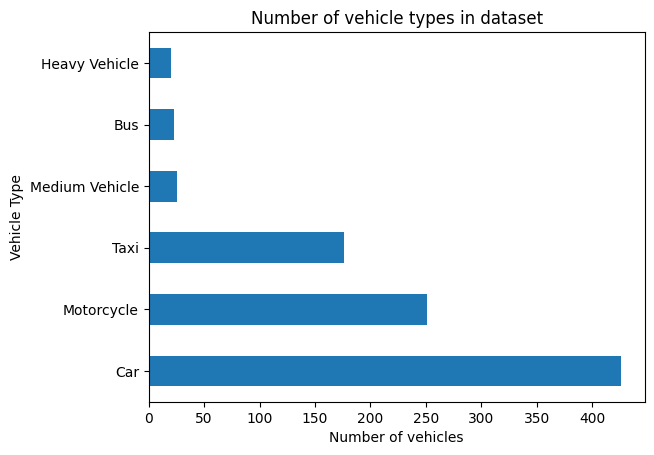

In [100]:
ax = df_vehicle.groupby('type')['type'].value_counts() \
    .sort_values(ascending=False) \
    .plot(kind='barh', title='Number of vehicle types in dataset')

ax.set_xlabel('Number of vehicles'); ax.set_ylabel('Vehicle Type'); 

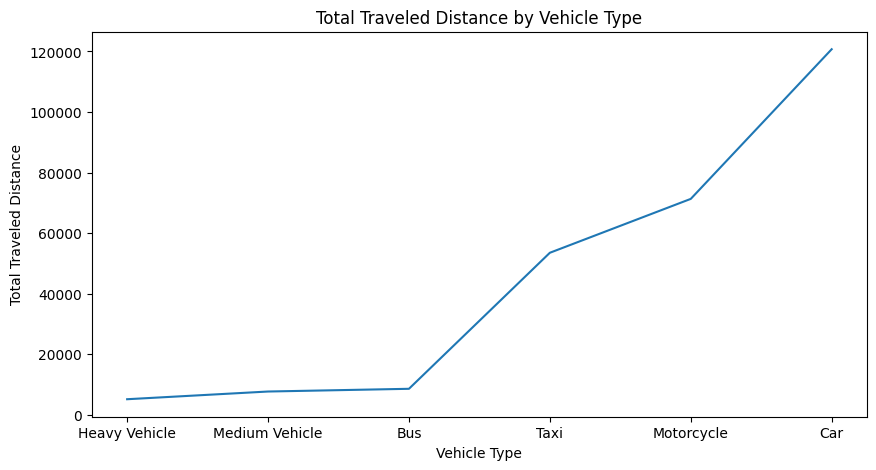

In [109]:
# group the data by type and plot the vehicles that traveled the longest distance overall
df_longest_travel = df_vehicle.groupby('type')['traveled_d'].sum().sort_values().reset_index()
plt.plot(df_longest_travel['type'], df_longest_travel['traveled_d'])
plt.xlabel('Vehicle Type')
plt.ylabel('Total Traveled Distance')
plt.title('Total Traveled Distance by Vehicle Type')
# increase the plot size
plt.rcParams["figure.figsize"] = (12, 5)

Text(0.5, 1.0, 'Average Speed by Vehicle Type')

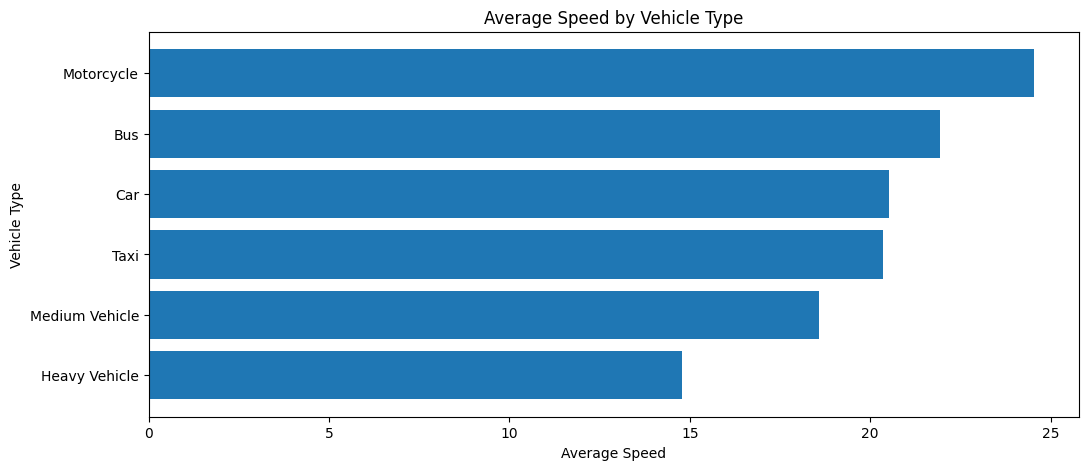

In [111]:
# group the data by type and plot the average speed
df_average_speed = df_vehicle.groupby('type')['avg_speed'].mean().sort_values().reset_index()
plt.barh(df_average_speed['type'], df_average_speed['avg_speed'])
plt.xlabel('Average Speed')
plt.ylabel('Vehicle Type')
plt.title('Average Speed by Vehicle Type')
